In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/hearing_test.csv')

In [3]:
df.head()

age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1

In [4]:
df.describe()

age  physical_score  test_result
count  5000.000000     5000.000000  5000.000000
mean     51.609000       32.760260     0.600000
std      11.287001        8.169802     0.489947
min      18.000000       -0.000000     0.000000
25%      43.000000       26.700000     0.000000
50%      51.000000       35.300000     1.000000
75%      60.000000       38.900000     1.000000
max      90.000000       50.000000     1.000000

In [5]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

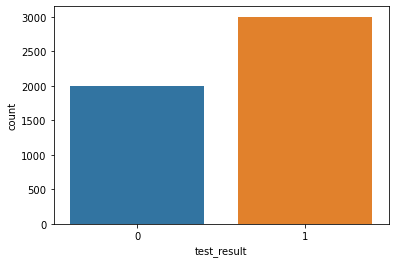

In [8]:
sns.countplot(data=df, x=df['test_result']);

<AxesSubplot:xlabel='test_result', ylabel='age'>

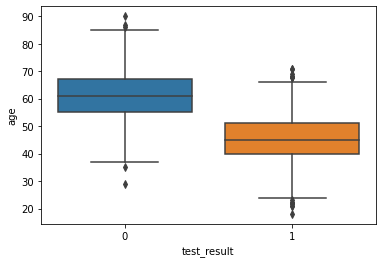

In [9]:
sns.boxplot(x='test_result', y='age', data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

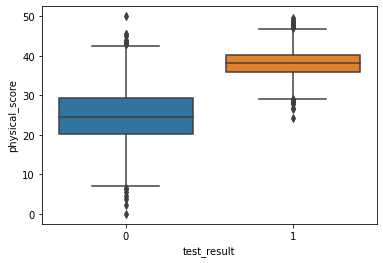

In [10]:
sns.boxplot(x='test_result', y='physical_score', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

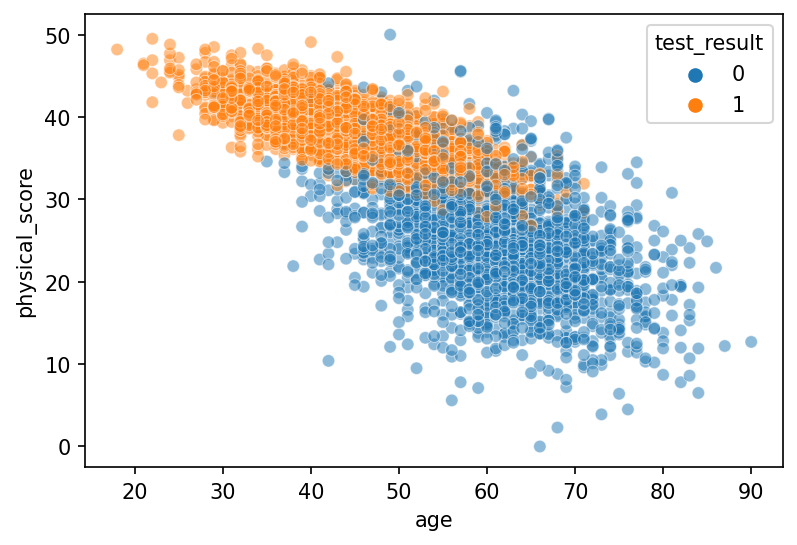

In [15]:
plt.figure(dpi=150)
sns.scatterplot(x='age', y='physical_score', data=df,hue='test_result', alpha=0.5)

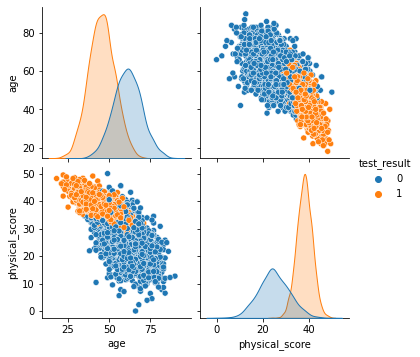

In [16]:
sns.pairplot(df,hue='test_result');

<AxesSubplot:>

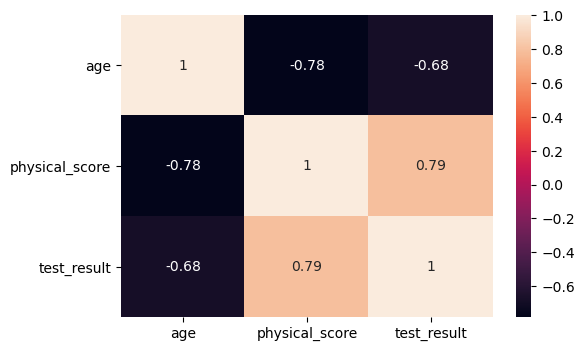

In [18]:
plt.figure(dpi=100)
sns.heatmap(df.corr(), annot=True)

### 2. Fit the model

In [19]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [23]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [26]:
# help(LogisticRegression)

In [27]:
log_model = LogisticRegression()

In [28]:
log_model.fit(scaler_X_train, y_train)

LogisticRegression()

In [29]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

### 3. Model Evaluation

In [37]:
y_pred = log_model.predict(scaler_X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
accuracy_score(y_test, y_pred)

0.93

In [39]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [40]:
from sklearn.metrics import plot_confusion_matrix

/Users/zouserena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


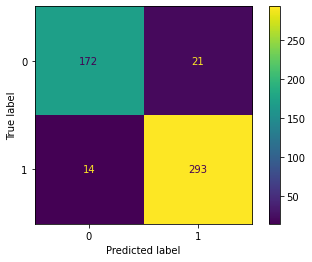

In [43]:
plot_confusion_matrix(log_model, scaler_X_test, y_test);

In [45]:
# recall = TP/all actual P, precision = TP/all predictced P 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [46]:
from sklearn.metrics import precision_score, recall_score

In [47]:
precision_score(y_test, y_pred)

0.9331210191082803

In [50]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

/Users/zouserena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


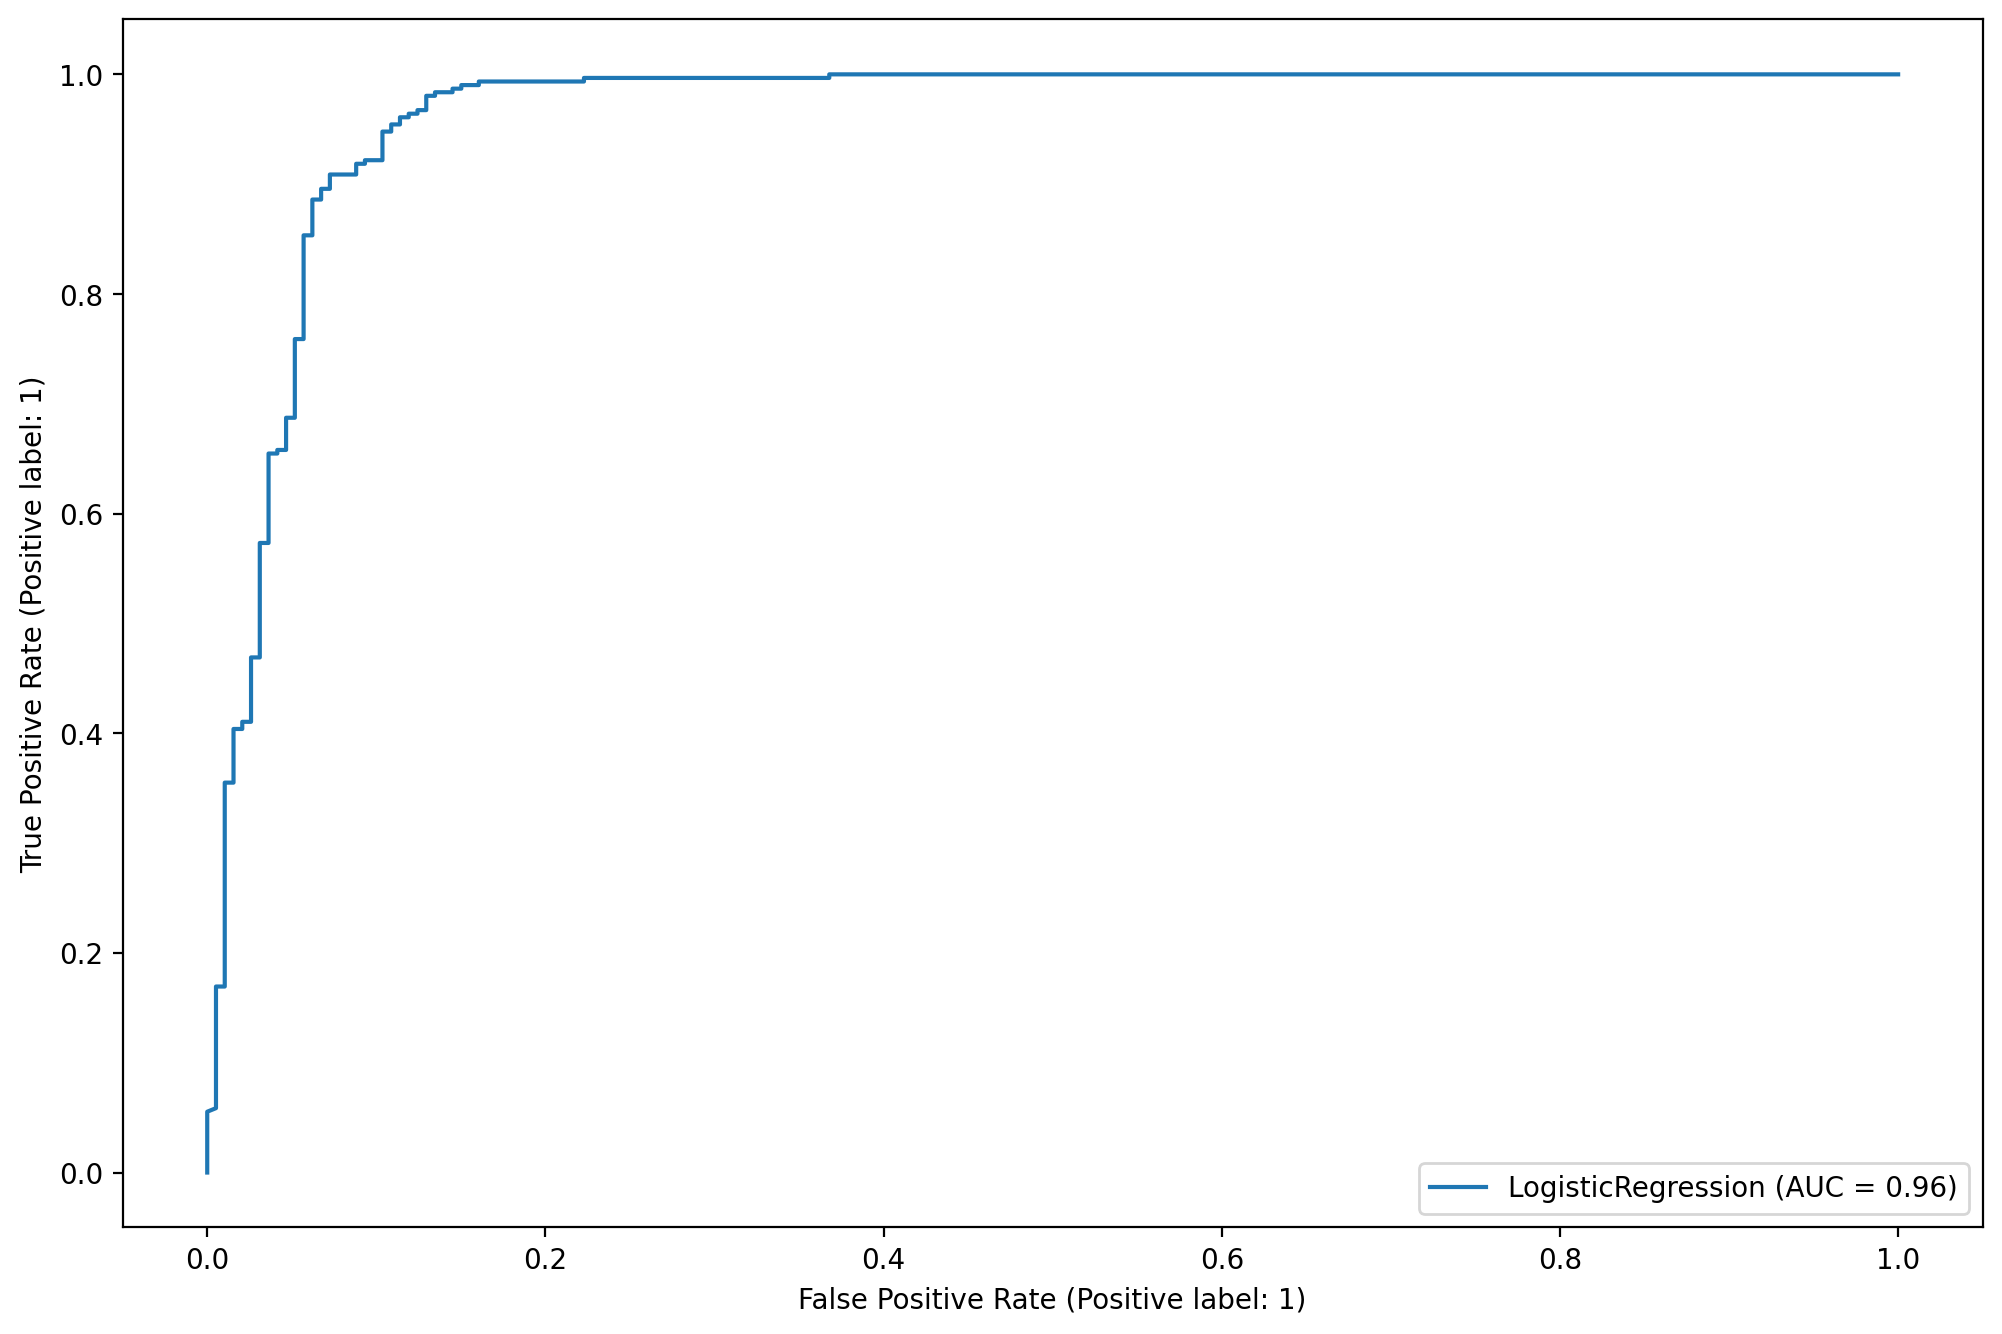

In [55]:
fig, ax = plt.subplots(figsize=(12,8), dpi=200)
plot_roc_curve(log_model, scaler_X_test, y_test, ax=ax);

/Users/zouserena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


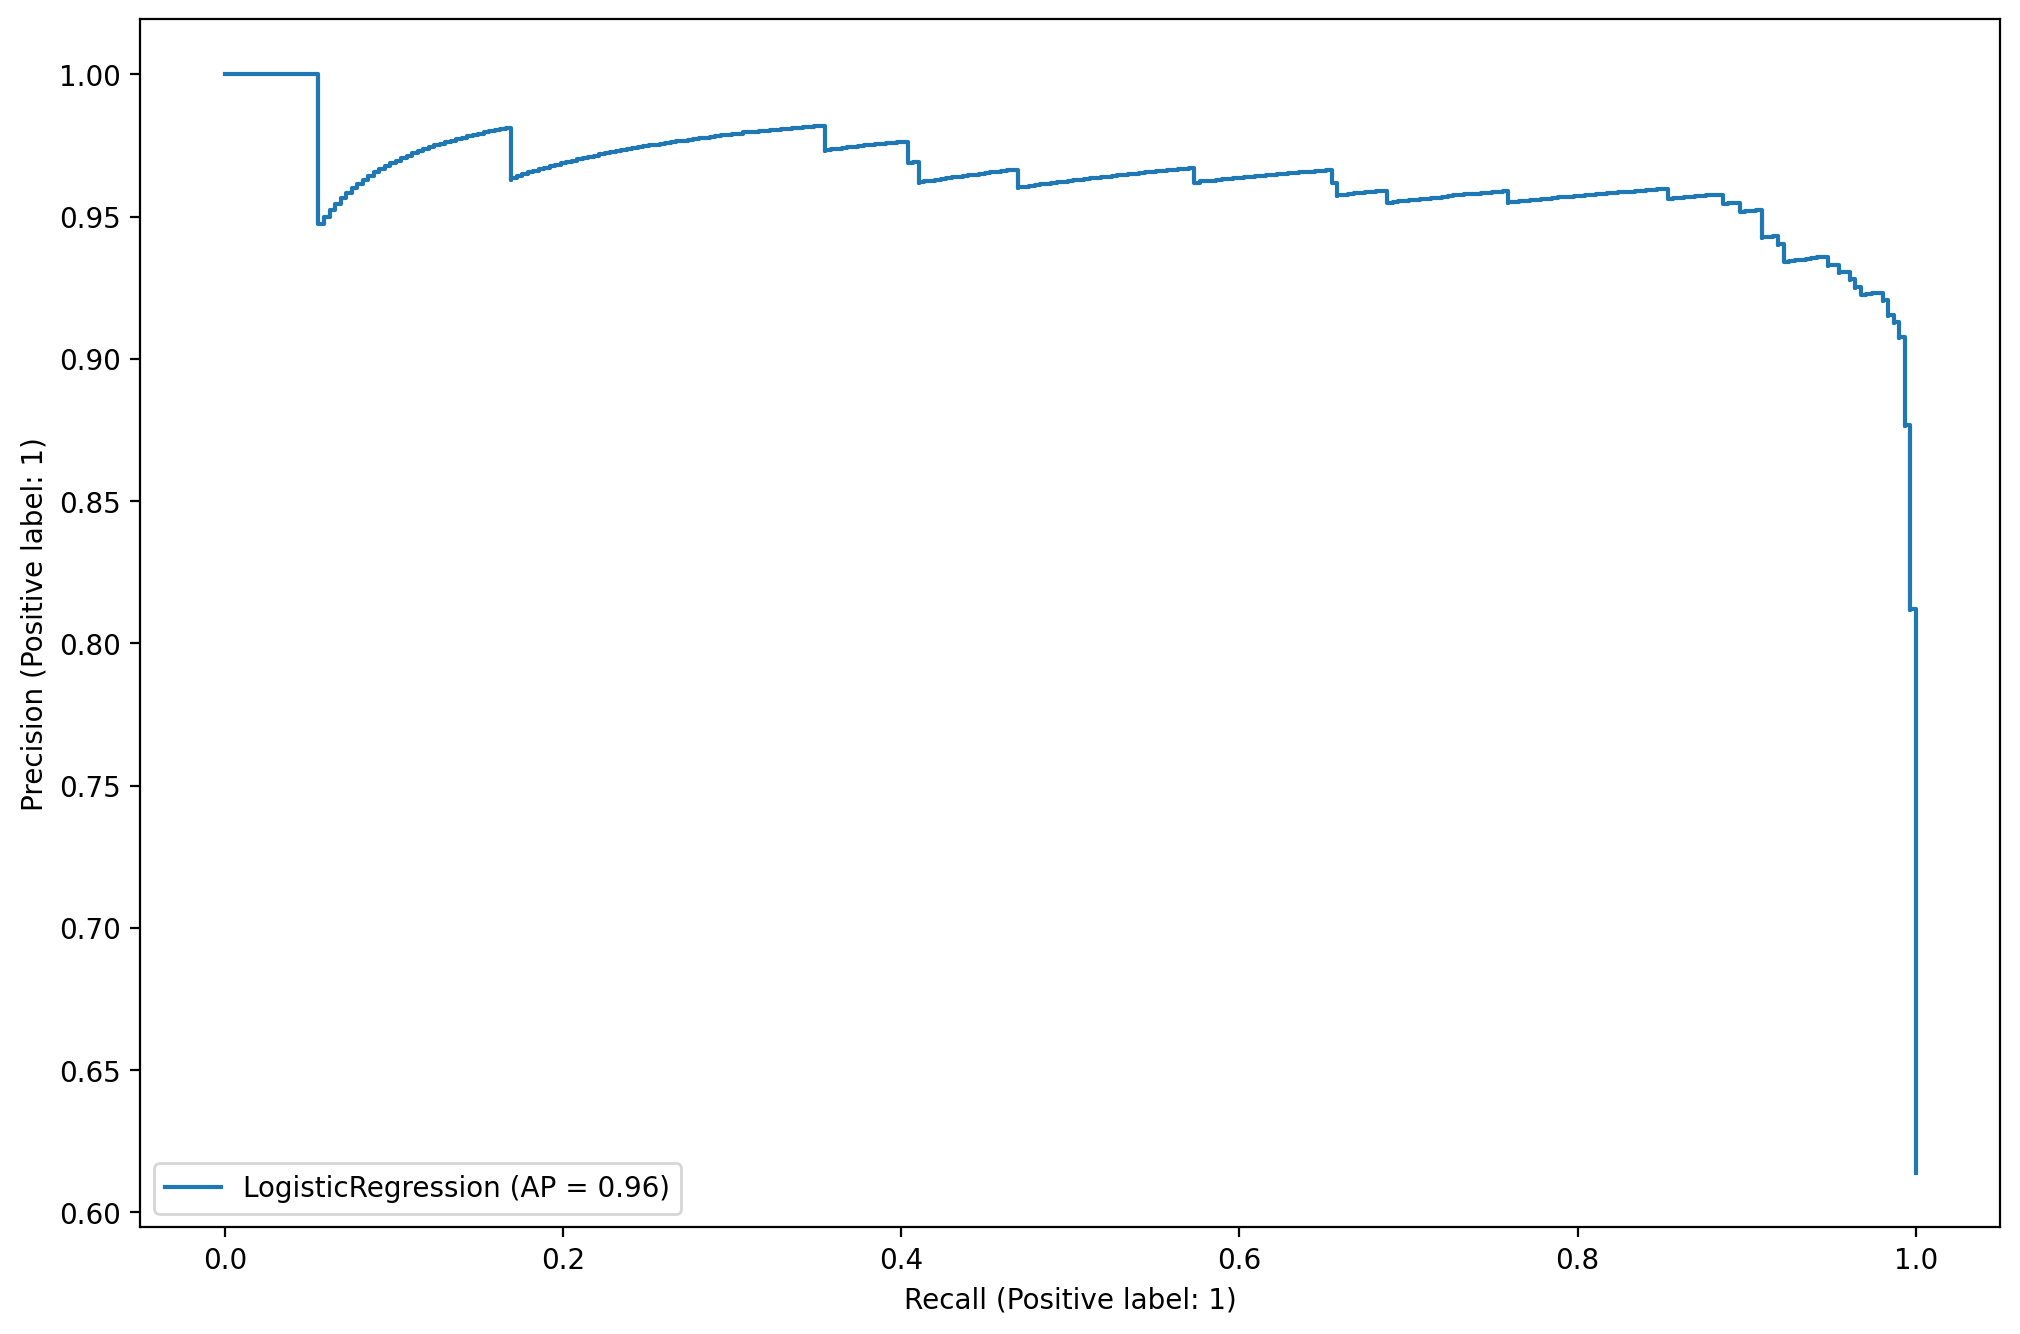

In [58]:
fig, ax = plt.subplots(figsize=(12,8), dpi=200)
plot_precision_recall_curve(log_model, scaler_X_test, y_test, ax=ax)